In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('ds_salaries.csv')

# Eraser duplicate
df.drop_duplicates(inplace=True)

Câu hỏi 1: Các ngành nào nhiều nhân sự nhất và mức lương trung bình tương ứng với mỗi ngành

/tmp/ipykernel_14763/2062685213.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)


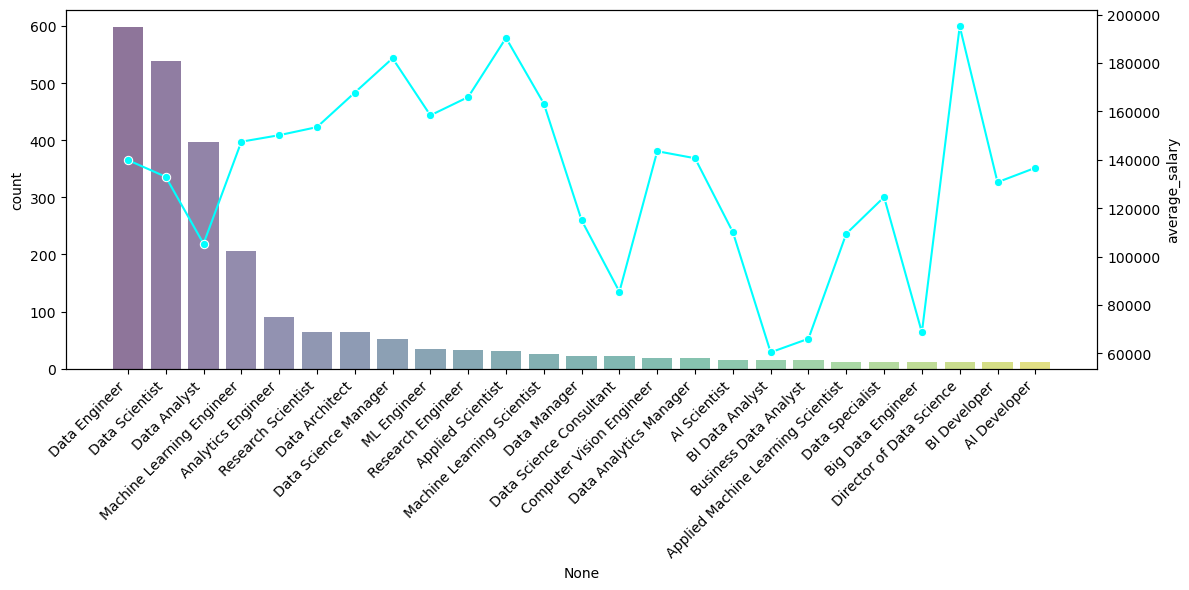

In [12]:
counts=df['job_title'].value_counts().head(25)

# Filter the DataFrame based on job titles in counts.index
filtered_df = df[df['job_title'].isin(counts.index)]

# Group by job_title and calculate the average salary
average_salary = filtered_df.groupby('job_title')['salary_in_usd'].mean()

# Create a DataFrame
combined_df = pd.DataFrame({'count': counts, 'average_salary': average_salary})
combined_df = combined_df.sort_values(by='count', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)
plt.xticks(rotation=45, ha='right')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for average salary
sns.lineplot(x=combined_df.index, y='average_salary', data=combined_df, ax=ax2, color='cyan', marker='o')



# Adjust layout for better visibility
plt.tight_layout()
plt.show()